# Decision Trees using OOP

1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data preprocessing

data containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

In [3]:
data.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4182


In [5]:
# making new data frame with dropped NA values 
new_data = data.dropna(axis = 0, how ='any') 
data = new_data

split the dataset to `Training` and `Testing` datasets.

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

In [7]:
def counting_labels(dataset_rows):
    """
    Counting y labels 
    Input:
    - dataset_rows: the dataset in rows
    Output: the accuracy of each type.
    """
    # a list: {elemet: #number of accuracy}
    labels_counter = {}
    for row in dataset_rows:
        y_label = row[-1] 
        if y_label not in labels_counter:
            labels_counter[y_label] = 0
        labels_counter[y_label] += 1
    return labels_counter

def gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    labels_counter = counting_labels(data)
    impurity = 1
    for lbl in labels_counter:
        impurity -=  (labels_counter[lbl] / float(len(data)))**2
    return impurity

In [8]:
import math

def entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    labels_counter = counting_labels(data)
    s = sum(labels_counter.values())
    probabilities = np.array([*labels_counter.values()]) / s
    entropy = 0
    
    for prob in probabilities:
        if prob > 0:
         # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)

    if entropy != 0:
        return -entropy 
    return entropy


In [9]:
# gini and entropy for dataset
gini(X), entropy(X)

no_mix = [['x'],['x']]
# 0
print("gini: " + str(gini(no_mix)))
# 0
print("entropy: " + str(entropy(no_mix)))

half_mix = [['x'],['y']]
# 0.5
print("gini: " + str(gini(half_mix)))
# 1
print("entropy: " + str(entropy(half_mix)))

mix = [['a'],['b'],['c'],['d'],['e']]
#  0.8
print("gini: " + str(gini(mix)))
# 2.32
print("entropy: " + str(entropy(mix)))

gini: 0.0
entropy: 0.0
gini: 0.5
entropy: 1.0
gini: 0.7999999999999998
entropy: 2.321928094887362


## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In [10]:
headers = [  'cap-shape',
            'cap-surface',
            'cap-color',
            'bruises?',
            'odor',
            'gill-attachment',
            'gill-spacing',
            'gill-size',
            'gill-color',
            'stalk-shape',
            'stalk-root',
            'stalk-surface-above-ring',
            'stalk-surface-below-ring',
            'stalk-color-above-ring',
            'stalk-color-below-ring',
            'veil-type',
            'veil-color',
            'ring-number',
            'ring-type',
            'spore-print-color',
            'population',
            'habitat' ]


class Column_With_Value:
    """Column_With_Value class holds the column index with specific value.

    init - for example: 'column number' 0 for cap-shape and a 'column value' x
    compare - compares the value of other row in self.column
    __repr__ - helper for print_tree to print the chosen column & values
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def compare(self, other_row):
        """
        Comparing this current value to other row value in self.column

        Input:
        - other_row: other row in data set.

        Returns if true equals else false.    
        """
        val = other_row[self.column]
        return val == self.value

    def __repr__(self):
        # helper function to print 
        condition = "=="
        return "Is %s %s %s?" % (
            headers[self.column], condition, str(self.value))


def info_gain(left, right, current_uncertainty, impurity_func):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * impurity_func(left) - (1 - p) * impurity_func(right)

def intrinsic_info(left, right):
    """Intrinsic info.

    the entropy of sub-dataset proportions
    """
    p = float(len(left)) / (len(left) + len(right))
    return  - (p * math.log(p, 2) + (1 - p) * math.log( 1- p, 2))


def partition(rows, column_value):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the column_value. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if column_value.compare(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


def goodness_of_split(rows, col, current_uncertainty, impurity_func, gain_ratio = False):

    values = set([row[col] for row in rows])  # unique values in the column
    best_gain, best_question = 0, None

    for val in values:  # for each value

        question = Column_With_Value(col, val)

        # try splitting the dataset
        true_rows, false_rows = partition(rows, question)

        # Skip this split if it doesn't divide the
        # dataset.
        if len(true_rows) == 0 or len(false_rows) == 0:
            continue

        # Calculate the information gain from this split
        gain = info_gain(true_rows, false_rows, current_uncertainty, impurity_func)

        if gain_ratio:
            intrinsic = intrinsic_info(true_rows, false_rows)
            # ratio gaim
            gain = gain / intrinsic

        # comparing
        if gain >= best_gain:
            best_gain, best_question = gain, question
    return best_gain, best_question


## Building a Decision Tree

`DecisionNode`. The structure of this class is entirely up to you. 
`build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree

In [11]:
class Decision_Node:
    """A Decision Node asks a column_value.

    This holds a reference to the column_value, and to the two child nodes.
    """

    def __init__(self,
                 column_value,
                 true_branch,
                 false_branch):
        self.column_value = column_value
        self.true_branch = true_branch
        self.false_branch = false_branch
    
    def size(self):
        count = 1
        if self.true_branch:
            count += self.true_branch.size()
        if self.false_branch:
            count += self.false_branch.size()
        return count 


class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = counting_labels(rows)
    
    def size(self):
        return 1



In [12]:
def find_best_split1(rows, impurity_func, gain_ratio = False):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain_all = 0  # keep track of the best information gain
    best_question_all = None  # keep train of the feature / value that produced it
    current_uncertainty = impurity_func(rows)
    n_features = len(rows[0]) - 1  # number of columns"

    for col in range(n_features):  # for each feature
        gain, question = goodness_of_split(rows, col, current_uncertainty, impurity_func, gain_ratio)
        if gain >= best_gain_all:
            best_gain_all, best_question_all = gain, question

    return best_gain_all, best_question_all

def build_tree(rows, impurity_func ,max_depth=1000, min_samples_split=1, gain_ratio=False):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """
    
    #A Stop condition in case of max_depth
    if not(max_depth) or min_samples_split >= np.shape(rows)[0]:
        return Leaf(rows)
    
    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the column_value that produces the highest gain.
    gain, column_value = find_best_split1(rows, impurity_func, gain_ratio)

    # Base case: no further info gain
    # Since we can ask no further column_values,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, column_value)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows, impurity_func,max_depth-1,min_samples_split, gain_ratio)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows, impurity_func,max_depth-1,min_samples_split, gain_ratio)

    # Return a Column_With_Value node.
    return Decision_Node(column_value, true_branch, false_branch)


In [13]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(rows=X_train, impurity_func=gini) # gini and goodness of split
tree_entropy = build_tree(rows=X_train, impurity_func=entropy)
# tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
# tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(rows=X_train, impurity_func=entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation


In [14]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return list(node.predictions.keys())[0]

    node.question = node.column_value
    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.compare(instance):
        return predict(node.true_branch,instance)
    else:
        return predict(node.false_branch,instance)

In [15]:
### Demo for predict function
random_row_idx=np.random.randint(X_train.shape[0])
random_row=X_train[random_row_idx]
prediction=predict(tree_gini,random_row)
print('Prediction for row {} is {}'.format(random_row_idx,prediction))

Prediction for row 3516 is p


In [16]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    for row in dataset:
        prediction = predict(node, row)
        label_class = row[-1]
        if prediction == label_class:
            accuracy+=1
    accuracy=np.round(accuracy/dataset.shape[0]*100,2)
    return accuracy 

In [17]:
### Demo for calc_accuracy function
accuracy1=calc_accuracy(tree_gini,X_train)
dataset_name=f'{X_train=}'.split('=')[0]
tree_name=f'{tree_gini=}'.split('=')[0]
print('Accuracy of tree: "{}" with dataset "{}" is {}'.format(tree_name,dataset_name,accuracy1))

accuracy2=calc_accuracy(tree_entropy,X_train)
dataset_name=f'{X_train=}'.split('=')[0]
tree_name=f'{tree_entropy=}'.split('=')[0]
print('Accuracy of tree: "{}" with dataset "{}" is {}'.format(tree_name,dataset_name,accuracy2))

accuracy3=calc_accuracy(tree_entropy_gain_ratio,X_train)
dataset_name=f'{X_train=}'.split('=')[0]
tree_name=f'{tree_entropy_gain_ratio=}'.split('=')[0]
print('Accuracy of tree: "{}" with dataset "{}" is {}'.format(tree_name,dataset_name,accuracy3))

accuracy4=calc_accuracy(tree_gini,X_test)
dataset_name=f'{X_test=}'.split('=')[0]
tree_name=f'{tree_gini=}'.split('=')[0]
print('Accuracy of tree: "{}" with dataset "{}" is {}'.format(tree_name,dataset_name,accuracy4))

accuracy5=calc_accuracy(tree_entropy,X_test)
dataset_name=f'{X_test=}'.split('=')[0]
tree_name=f'{tree_entropy=}'.split('=')[0]
print('Accuracy of tree: "{}" with dataset "{}" is {}'.format(tree_name,dataset_name,accuracy5))

accuracy6=calc_accuracy(tree_entropy_gain_ratio,X_test)
dataset_name=f'{X_test=}'.split('=')[0]
tree_name=f'{tree_entropy_gain_ratio=}'.split('=')[0]
print('Accuracy of tree: "{}" with dataset "{}" is {}'.format(tree_name,dataset_name,accuracy6))

Accuracy of tree: "tree_gini" with dataset "X_train" is 98.29
Accuracy of tree: "tree_entropy" with dataset "X_train" is 98.42
Accuracy of tree: "tree_entropy_gain_ratio" with dataset "X_train" is 98.49
Accuracy of tree: "tree_gini" with dataset "X_test" is 78.09
Accuracy of tree: "tree_entropy" with dataset "X_test" is 78.63
Accuracy of tree: "tree_entropy_gain_ratio" with dataset "X_test" is 78.58


## Depth pruning


for each of the next max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. construct a tree and prune it according to the max_depth value(don't let the tree to grow beyond this depth)

In [18]:
#Calculate depth pruning
max_depth_arr=np.arange(1,9,1)
accuracy_arr_train=[]
accuracy_arr_test=[]
for max_depth in max_depth_arr:
    tree=build_tree(rows=X_train, impurity_func=entropy, max_depth=max_depth)  # gini and goodness of split
    accuracy_arr_test.append(calc_accuracy(tree, X_test))
    accuracy_arr_train.append(calc_accuracy(tree, X_train))
accuracy_arr_test=np.array(accuracy_arr_test)
accuracy_arr_train=np.array(accuracy_arr_train)

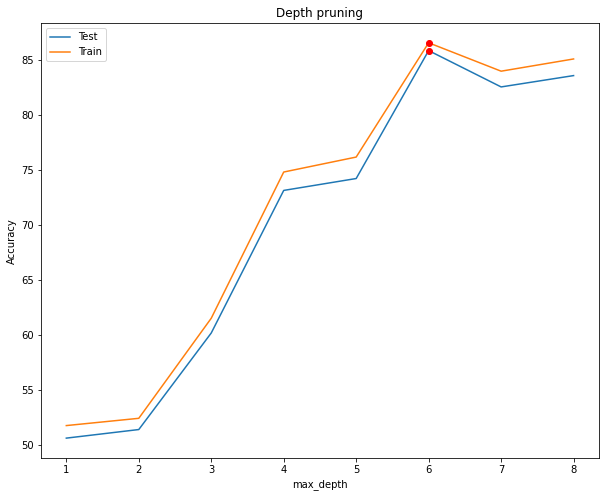

In [19]:
#Plot depth pruning
x0,y0=accuracy_arr_test.argmax()+1,accuracy_arr_test.max()
x1,y1=accuracy_arr_train.argmax()+1,accuracy_arr_train.max()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.plot(max_depth_arr,accuracy_arr_test,label='Test',markevery=accuracy_arr_test.argmax())
plt.plot(max_depth_arr,accuracy_arr_train,label='Train',markevery=accuracy_arr_train.argmax())
plt.plot(x0,y0, "-or")
plt.plot(x1,y1, "-or")
plt.title("Depth pruning")
plt.legend()
plt.show()

## Min Samples Split
for each of the following min_samples_split values: [1, 5, 10, 20, 50]. construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value

In [20]:
min_split_values=np.array([1,5,10,20,50])
accuracy_arr_train=[]
accuracy_arr_test=[]
for min_split_value in min_split_values:
    tree=build_tree(rows=X_train, impurity_func=gini, min_samples_split=min_split_value)
    accuracy_arr_test.append(calc_accuracy(tree, X_test))
    accuracy_arr_train.append(calc_accuracy(tree, X_train))
accuracy_arr_test=np.array(accuracy_arr_test)
accuracy_arr_train=np.array(accuracy_arr_train)

20 83.01
1 98.29


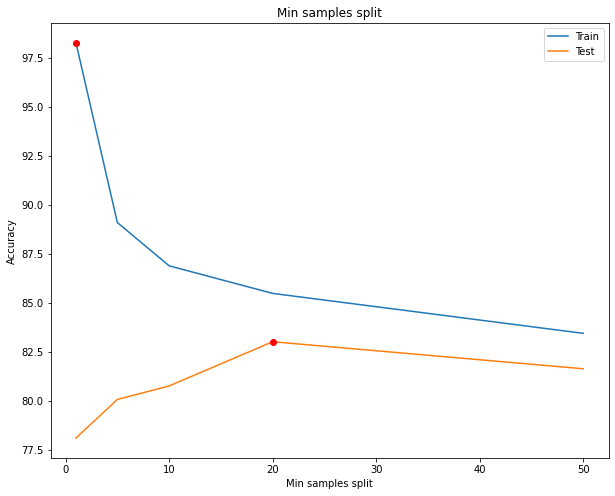

In [21]:
#Plot Min samples split
plt.xlabel('Min samples split')
plt.ylabel('Accuracy')
plt.plot(min_split_values,accuracy_arr_train,label='Train',markevery=accuracy_arr_train.argmax())
plt.plot(min_split_values,accuracy_arr_test,label='Test',markevery=accuracy_arr_test.argmax())
x0,y0=min_split_values[accuracy_arr_test.argmax()],accuracy_arr_test.max()
x1,y1=min_split_values[accuracy_arr_train.argmax()],accuracy_arr_train.max()
print(x0,y0)
print(x1,y1)
plt.plot(x0,y0, "-or")
plt.plot(x1,y1, "-or")
plt.title("Min samples split")
plt.legend()
plt.show()

### Best two trees
1.tree_max_depth - the best tree according to max_depth pruning

2.tree_min_samples_split - the best tree according to min_samples_split pruning

In [22]:
tree_min_samples_split=build_tree(rows=X_train, impurity_func=entropy, min_samples_split=20)
tree_max_depth=build_tree(rows=X_train, impurity_func=gini, max_depth=6)
tree_mixed=build_tree(rows=X_train, impurity_func=gini, max_depth=6, min_samples_split=20)
print(calc_accuracy(tree_min_samples_split, X_train))
print(calc_accuracy(tree_max_depth, X_train))
print(calc_accuracy(tree_mixed, X_train))

85.61
86.46
86.26


## Number of Nodes

counts_nodes - print the number of nodes in each tree and print the number of nodes of the two trees above

In [23]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    #print(node.size())
    return node.size()
    

In [24]:
print(count_nodes(tree_max_depth))
print(count_nodes(tree_min_samples_split))

95
843


## Print the tree

visualized the tree clearly.
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts


In [25]:
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    if type(node) == Leaf:
        print(depth*'  '+'[X{}={}, leaf]: [{}]'.format(parent_feature,feature_val,node.predictions))
        return
    feature_val = node.column_value.value
    current_feature=node.column_value.column
    if parent_feature=='ROOT':
        print(depth*'  '+'[{}, feature=X{}]'.format(parent_feature,current_feature))
    else:
        print(depth*'  '+'[X{}={}, feature=X{}]'.format(parent_feature,feature_val,current_feature))
    depth+=1
    print_tree(node.true_branch,depth, current_feature, feature_val)
    print_tree(node.false_branch,depth, current_feature, feature_val)

print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

In [26]:
max_depth_arr=np.arange(1,9,1)
min_split_values=np.array([1,5,10,20,50])
pruning_params=np.array(np.meshgrid(max_depth_arr,min_split_values))
pruning_params=pruning_params.T.reshape(-1,2)

acc=0
for depth,split in pruning_params:
    tree=build_tree(rows=X_test, impurity_func=entropy, max_depth=depth, min_samples_split=split)
    if count_nodes(tree) < 50:
        if calc_accuracy(tree, X_test) > acc:
            acc = calc_accuracy(tree, X_test)
            tree_best_test = tree
            best_depth=depth
            best_split=split
            

In [27]:
print("tree with best test accuracy has accuracy:{}, max depth:{}, min split:{}".format(acc,best_depth,best_split))
print_tree(tree_best_test)

tree with best test accuracy has accuracy:87.54, max depth:5, min split:1
[ROOT, feature=X4]
  [X4=r, feature=X18]
    [X18=p, feature=X2]
      [X2=g, feature=X8]
        [X8=g, leaf]: [{'p': 3}]
        [X8=m, feature=X20]
          [X20=m, leaf]: [{'e': 1}]
          [X20=m, leaf]: [{'p': 4, 'e': 1}]
      [X2=p, leaf]: [{'p': 11}]
    [X18=y, feature=X11]
      [X11=x, feature=X0]
        [X0=y, feature=X1]
          [X1=y, leaf]: [{'e': 1, 'p': 1}]
          [X1=y, leaf]: [{'e': 3}]
        [X0=x, leaf]: [{'p': 5}]
      [X11=s, feature=X1]
        [X1=k, feature=X10]
          [X10=k, leaf]: [{'e': 14}]
          [X10=k, leaf]: [{'e': 153, 'p': 28}]
        [X1=k, feature=X10]
          [X10=k, leaf]: [{'p': 5, 'e': 12}]
          [X10=k, leaf]: [{'e': 560, 'p': 50}]
  [X4=f, feature=X3]
    [X3=w, feature=X6]
      [X6=w, leaf]: [{'p': 19}]
      [X6=y, feature=X1]
        [X1=d, feature=X20]
          [X20=d, leaf]: [{'p': 125, 'e': 20}]
          [X20=d, leaf]: [{'p': 241, 'e'